## Neo4j driver for Python

In [1]:
from neo4j.v1 import GraphDatabase
import matplotlib.pyplot as plt

### SOME VARIABLES NEEDED FOR CONNECT TO THE DATABASE AND RETRIEVE DATA

In [2]:
uri = "bolt://localhost:7687"  # DATABASE URI
driver = GraphDatabase.driver(uri, auth=("neo4j", "admin"))  # DRIVER NEO4J
session = driver.session()  # SESSION
tx = session.begin_transaction()  # TRANSACTION

### WE DEFINE SOME METHODS

In [3]:
def get_districts():  # DISTRICTS LIST
    list_dis = []
    for record in tx.run("MATCH (dis:District) RETURN dis.district"):
        aux = record["dis.district"]
        # print(aux)
        list_dis.append(aux)
    return list_dis


def get_count_districts():  # NUMBER OF DISTRICTS
    record = tx.run("MATCH (dis:District) RETURN count(dis)")
    count = record.single()[0]
    return count


def get_count_incidents_district(district):  # NUMBER OF INCIDENTS IN A DISTRICT
    record = tx.run("MATCH (dis:District {district: $district}) RETURN size(()-[:WHERE]->(dis))", district=district)
    count = record.single()[0]
    return count


def get_categories():  # CATEGORIES LIST
    list_cat = []
    for record in tx.run("MATCH (cat:Category) RETURN cat.category"):
        aux = record["cat.category"]
        # print(aux)
        list_cat.append(aux)
    return list_cat


def get_count_categories():  # NUMBER OF CATEGORIES
    record = tx.run("MATCH (cat:Category) RETURN count(cat)")
    count = record.single()[0]
    return count


def get_count_incidents_category(category):  # NUMBER OF INCIDENTS OF A CATEGORY
    record = tx.run("MATCH (cat:Category {category: $category}) RETURN size(()-[:WHAT]->(cat))", category=category)
    count = record.single()[0]
    return count


def get_count_incidents_district_category(district, category):  # NUMBER OF INCIDENTS IN A DISTRICT OF A CATEGORY
    record = tx.run(
        "MATCH (cat:Category {category: $category}), (dis:District {district: $district}) RETURN size((cat)<-["
        ":WHAT]-()-[:WHERE]->(dis))",
        district=district, category=category)
    count = record.single()[0]
    return count

### TESTING METHODS

In [4]:
districts = get_districts()
n_districts = get_count_districts()
print("Number of districts: " + str(n_districts))

categories = get_categories()
n_categories = get_count_categories()
print("Number of categories: " + str(n_categories))

print("Number of incidents in TENDERLOIN: " + str(get_count_incidents_district("TENDERLOIN")))
print("Number of cases of DRUKENNESS: " + str(get_count_incidents_category("DRUNKENNESS")))
print("Number of cases of DRUG/NARCOTIC in BAYVIEW: " + str(get_count_incidents_district_category("BAYVIEW", "DRUG/NARCOTIC")))

Number of districts: 10
Number of categories: 39
Number of incidents in TENDERLOIN: 128872
Number of cases of DRUKENNESS: 9770
Number of cases of DRUG/NARCOTIC in BAYVIEW: 9757


### LET'S PLOT A CHART!!

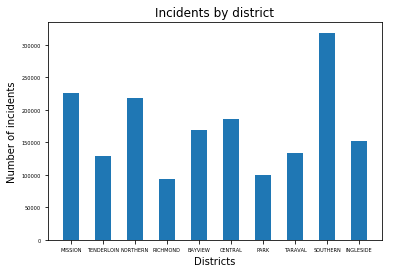

In [5]:
list_inc = []
for dis in districts: # RETRIVE THE COUNT OF INCIDENTS FOR EACH DISTRICT
    list_inc.append(get_count_incidents_district(dis))

fig = plt.figure()
plot = fig.add_subplot(111)

xx = range(1, len(list_inc)+1)

# BAR CHART
plot.bar(xx, list_inc, width=0.5)
plot.set_xticks(xx)
plot.set_xticklabels(districts)
plot.set_title('Incidents by district')
plot.set_xlabel('Districts')
plot.set_ylabel('Number of incidents')
plot.tick_params(axis='both', which='major', labelsize=5)

plt.show() # SHOW THE BAR CHART

### CLOSE DATABASE SESSION

In [6]:
session.close()